In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt



# 데이터 로드
url = "/Users/anchanghun/Downloads/AI_Study/Dataset/wine+quality/winequality-white.csv" 
white_df = pd.read_csv(url, encoding='utf-8', sep=';')
url = "/Users/anchanghun/Downloads/AI_Study/Dataset/wine+quality/winequality-red.csv" 
red_df = pd.read_csv(url, encoding='utf-8', sep=';')

In [2]:
# 결측치 여부 확인
print(white_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [3]:
print(red_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


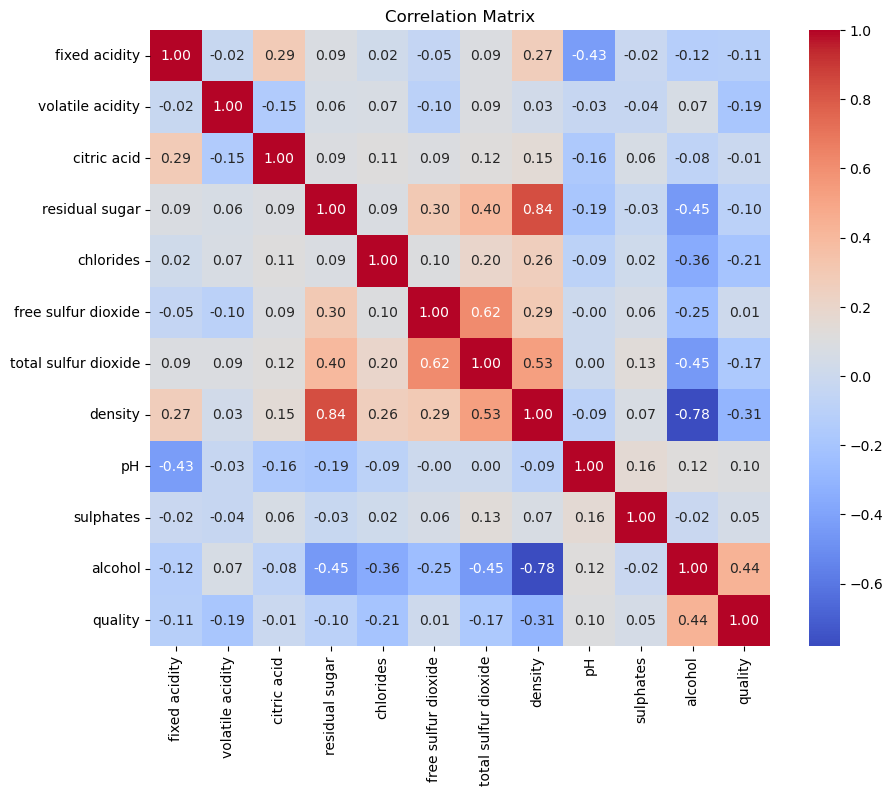

In [4]:
correlation_matrix = white_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

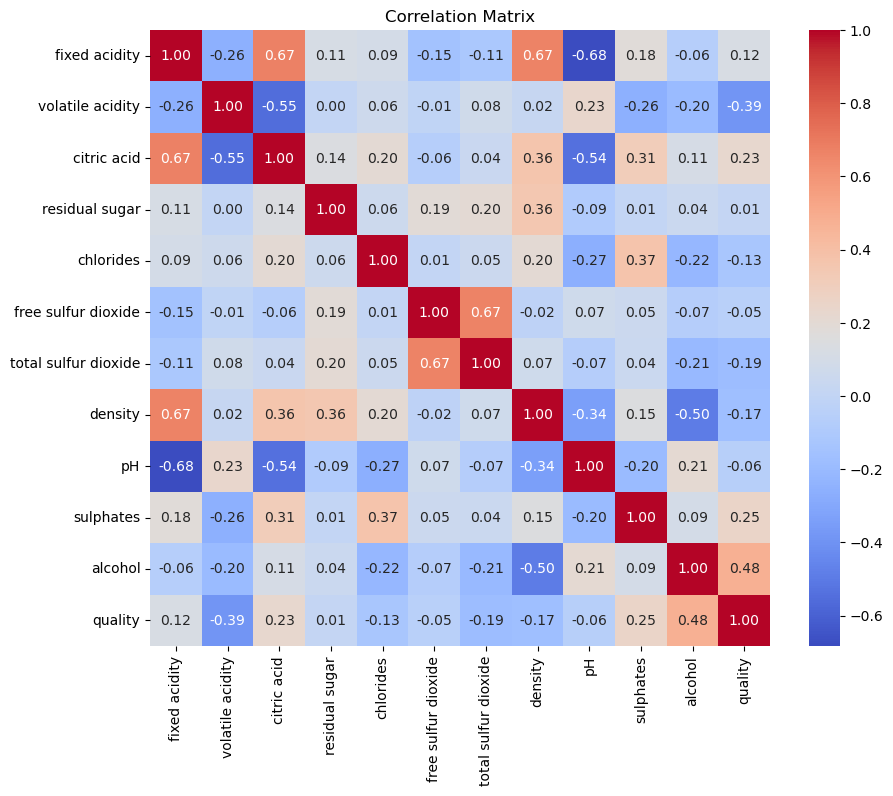

In [5]:
correlation_matrix = red_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

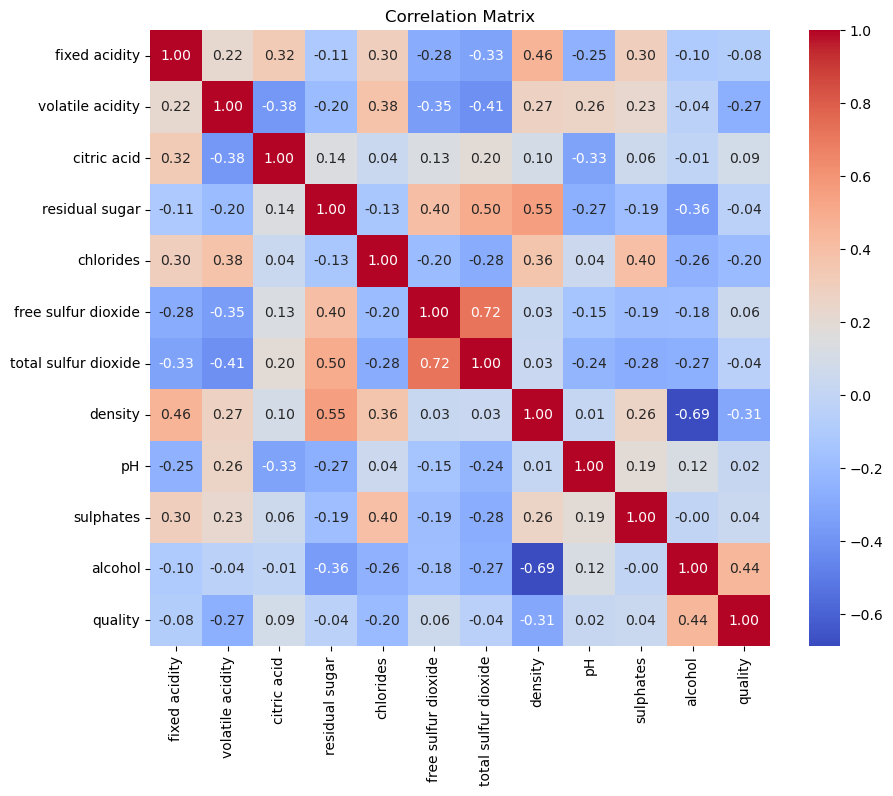

In [6]:
# 두 데이터의 feature이 같고, 양식 비슷하므로 conacat으로 붙인다.

df = pd.concat([red_df,white_df])

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
def classification_model(X_train, y_train, X_test, y_test):
    # SVM
    svm_classifier = SVC()
    svm_classifier.fit(X_train, y_train)
    svm_pred_class = svm_classifier.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_pred_class)
    print("SVM Classifier Accuracy:", svm_accuracy)
    print(classification_report(y_test, svm_pred_class, zero_division=1))

    # Logistic Regression
    lr_classifier = LogisticRegression(max_iter=1000, solver='liblinear')
    lr_classifier.fit(X_train, y_train)
    lr_pred_class = lr_classifier.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_pred_class)
    print("Logistic Regression Classifier Accuracy:", lr_accuracy)
    print(classification_report(y_test, lr_pred_class, zero_division=1))

    # Decision Tree
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    dt_pred_class = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred_class)
    print("Decision Tree Classifier Accuracy:", dt_accuracy)
    print(classification_report(y_test, dt_pred_class, zero_division=1))

    # Random Forest
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    rf_pred_class = rf_classifier.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred_class)
    print("Random Forest Classifier Accuracy:", rf_accuracy)
    print(classification_report(y_test, rf_pred_class, zero_division=1))

    # K-Nearest Neighbors
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)
    knn_pred_class = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred_class)
    print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)
    print(classification_report(y_test, knn_pred_class, zero_division=1))
    
def regression_model(X_train, y_train, X_test, y_test):
    # Decision Tree Regression
    dt_regressor = DecisionTreeRegressor()
    dt_regressor.fit(X_train, y_train)
    dt_pred_reg = dt_regressor.predict(X_test)
    dt_mse = mean_squared_error(y_test, dt_pred_reg)
    print("Decision Tree Regressor Mean Squared Error:", dt_mse)

    # Random Forest Regression
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    rf_pred_reg = rf_regressor.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred_reg)
    print("Random Forest Regressor Mean Squared Error:", rf_mse)

    # K-Nearest Neighbors Regression
    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train, y_train)
    knn_pred_reg = knn_regressor.predict(X_test)
    knn_mse = mean_squared_error(y_test, knn_pred_reg)
    print("K-Nearest Neighbors Regressor Mean Squared Error:", knn_mse)

In [8]:
# 데이터 전처리
X = df.drop("quality", axis=1)  # 특성
y_classification = df["quality"]  # 분류 레이블
y_regression = df["residual sugar"]  # 회귀 레이블

# 특성 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

classification_model(X_train_class,  y_train_class, X_test_class, y_test_class)
regression_model(X_train_reg, y_train_reg, X_test_reg, y_test_reg)

SVM Classifier Accuracy: 0.56
              precision    recall  f1-score   support

           3       0.00      0.00      1.00         6
           4       1.00      0.00      0.00        43
           5       0.58      0.65      0.61       402
           6       0.55      0.71      0.62       597
           7       0.61      0.20      0.30       215
           8       1.00      0.00      0.00        36
           9       1.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.68      0.22      0.36      1300
weighted avg       0.59      0.56      0.53      1300

Logistic Regression Classifier Accuracy: 0.5261538461538462
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       1.00      0.00      0.00        43
           5       0.53      0.61      0.57       402
           6       0.53      0.69      0.60       597
           7       0.49      0.13      0.2

In [9]:
from sklearn.preprocessing import MinMaxScaler


# 데이터 전처리
X = df.drop("quality", axis=1)  # 특성
y_classification = df["quality"]  # 분류 레이블
y_regression = df["residual sugar"]  # 회귀 레이블

# MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

classification_model(X_train_class,  y_train_class, X_test_class, y_test_class)
regression_model(X_train_reg, y_train_reg, X_test_reg, y_test_reg)

SVM Classifier Accuracy: 0.5561538461538461
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        43
           5       0.58      0.61      0.60       402
           6       0.54      0.73      0.62       597
           7       0.59      0.19      0.28       215
           8       1.00      0.00      0.00        36
           9       1.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.82      0.22      0.21      1300
weighted avg       0.59      0.56      0.52      1300

Logistic Regression Classifier Accuracy: 0.5246153846153846
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        43
           5       0.53      0.62      0.57       402
           6       0.52      0.71      0.60       597
           7       0.44     

In [10]:
from sklearn.preprocessing import RobustScaler

# 데이터 전처리
X = df.drop("quality", axis=1)  # 특성
y_classification = df["quality"]  # 분류 레이블
y_regression = df["residual sugar"]  # 회귀 레이블

# RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

classification_model(X_train_class,  y_train_class, X_test_class, y_test_class)
regression_model(X_train_reg, y_train_reg, X_test_reg, y_test_reg)

SVM Classifier Accuracy: 0.5623076923076923
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        43
           5       0.58      0.65      0.62       402
           6       0.55      0.72      0.62       597
           7       0.62      0.19      0.29       215
           8       1.00      0.00      0.00        36
           9       1.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.82      0.22      0.22      1300
weighted avg       0.60      0.56      0.52      1300

Logistic Regression Classifier Accuracy: 0.5253846153846153
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       1.00      0.00      0.00        43
           5       0.53      0.61      0.57       402
           6       0.53      0.69      0.60       597
           7       0.48     